<a href="https://colab.research.google.com/github/tiburon-blanco/herramientasCienciaDeDatos/blob/main/trabajo_practico_02_Antolini_Martin_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como se evaluaran los trabajos.
- Se debe entregar un 1 archivo con formato ipynb. Para esto voy al menú del colab a la sección Archivo -> Descarga -> ipynb.
- El archivo que se sube a la plataforma debe poseer los resultados de la ejecución.
- El notebook debe entregarse ejecutado.
- Los scripts deben funcionar, es decir, al ejecutar todo el notebook no se deben generar errores. Para esto voy al menú del colab a la sección Ejecución -> Ejecutar todo (ctrl+f9) y no debe generar errores.
- Utilizar nombres de variables que describan la acción (no utilizar nombres como a,x,p, etc).
- El nombre del archivo debe ser "trabajo_practico_0X-Apellido_Nombre.ipynb" o "trabajo_practico_0X_Apellido_Nombre.ipynb". Siendo la X el número del trabajo práctico.
- Solo se admite 1 respuesta por ejercicio, en caso de existir más de 1 respuesta, el ejercicio se tomará como incorrecto.
- Comentar utilizando las normas de python (pep8 o google).
- Utilizar type hints.
- Manejo y validación de errores.
- Utilización de formularios (en caso de ser solicitado).
- En caso de que no se cumplan los puntos anteriores se descontarán puntos.
- No está permitido montar el drive personal.

---

Vamos a trabajar con un dataset que contiene información de IMDb (Internet movie Database).

Las columnas son:
* id: Identificador único asignado a cada película o serie de televisión dentro del dataset. Este ID permite distinguir cada entrada de las demás.

* title: Título principal de la película o serie de televisión tal como se conoce comúnmente.

* type: Indica el tipo de contenido al que corresponde la fila, generalmente puede ser "movie" (película) o "show" (serie de televisión).

* description: Un breve resumen o sinopsis del argumento o la premisa de la película o serie de televisión.

* release_year: Año en el que la película fue estrenada o en el que se emitió el primer episodio de la serie de televisión.

* age_certification: Clasificación por edad o certificación de contenido (por ejemplo, PG-13, R, TV-MA). Esta información indica la audiencia para la que se considera apropiado el contenido. Puede estar ausente si no se dispone de esta información.

* runtime: Duración total de la película en minutos o la duración promedio de un episodio de la serie de televisión en minutos.

* genres: Lista de los géneros cinematográficos o televisivos a los que pertenece la película o serie (por ejemplo, drama, action, thriller, european). Puede haber múltiples géneros asociados a una misma entrada.

* production_countries: Lista de los países que estuvieron involucrados en la producción de la película o serie de televisión.

* seasons: Número total de temporadas que tiene una serie de televisión. Esta columna generalmente solo aplica a las entradas donde la columna "type" es "show". Para las películas, esta columna podría estar vacía o contener un valor nulo.

* imdb_id: Identificador único asignado a la película o serie de televisión dentro de la base de datos de IMDb (Internet Movie Database). Este ID permite enlazar la entrada con su página correspondiente en IMDb.

* imdb_score: Puntuación o calificación promedio que los usuarios de IMDb han otorgado a la película o serie de televisión. Generalmente es un valor numérico entre 0 y 10.

* imdb_votes: Número total de votos o calificaciones que la película o serie de televisión ha recibido por parte de los usuarios de IMDb. Un mayor número de votos puede indicar una mayor popularidad o un consenso más sólido sobre la puntuación.

* tmdb_popularity: Un valor numérico que representa la popularidad de la película o serie de televisión en la base de datos de TMDB (The Movie Database). Este valor se calcula en base a diversas métricas de actividad de los usuarios en la plataforma.

* tmdb_score: Puntuación o calificación promedio que los usuarios de TMDB han otorgado a la película o serie de televisión. Generalmente es un valor numérico entre 0 y 10.

[Descargar dataset](https://raw.githubusercontent.com/HAD141/datasets/refs/heads/main/TrabajosPracticos/imdb/titles.csv)

## === SECCIÓN 1: IMPORTACIONES Y CARGA DEL DATASET ===


In [202]:
# === SECCIÓN 1: IMPORTACIONES Y CARGA DEL DATASET ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Optional
from pandas import DataFrame
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

import re


# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Download necessary NLTK resources
nltk.download('punkt_tab') # Added this line
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')



# (Opcional) tamaño de figuras
plt.rcParams['figure.figsize'] = (8, 4)




# Descargar recursos necesarios de NLTK (solo una vez)
nltk.download('punkt')
nltk.download('stopwords')



# Función para cargar
def load_dataset(csv_path: str) -> DataFrame:
    """Carga robusta del CSV IMDb con validaciones."""
    return pd.read_csv(csv_path, encoding="utf-8", low_memory=False)

# Ruta del dataset
CSV_PATH = "https://raw.githubusercontent.com/HAD141/datasets/refs/heads/main/TrabajosPracticos/imdb/titles.csv"

# Carga única del dataset
df = load_dataset(CSV_PATH)

print(f"✅ Dataset cargado: {imdb_df.shape[0]} filas, {imdb_df.shape[1]} columnas")

✅ Dataset cargado: 5850 filas, 15 columnas


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Ejercicio 1

* Descargar y levantar el DataSet, mostrar las 12 primeras filas, y obtener información general (shape, tipos de datos, nulos).

In [203]:
# ==============================================
# EJERCICIO 1 - Exploración general del dataset
# ==============================================

# Mostrar las 12 primeras filas
display(df.head(12))

# Mostrar información general
print("\n🔹 Dimensiones del dataset (filas, columnas):", df.shape)

print("\n🔹 Tipos de datos por columna:")
display(df.dtypes)

print("\n🔹 Cantidad de valores nulos por columna:")
display(df.isnull().sum())



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"drama, crime",US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"drama, action, thriller, european",US,NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"fantasy, action, comedy",GB,NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"war, action","GB, US",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"comedy, european",GB,4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"thriller, action, crime",US,NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"crime, drama, action",US,NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"romance, action, drama",US,NaN,tt0080453,5.8,69844.0,50.324,6.156



🔹 Dimensiones del dataset (filas, columnas): (5850, 15)

🔹 Tipos de datos por columna:


,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64



🔹 Cantidad de valores nulos por columna:


,0
id,0
title,1
type,0
description,18
release_year,0
age_certification,2619
runtime,0
genres,59
production_countries,230
seasons,3744


# Ejercicio 2
* Mostrar todos los títulos  ordenados alfabéticamente, separados por tipo, numerados desde 0 dentro de cada tipo. Para cada tipo agregar la cantidad total de títulos.

<br>

_Salida esperada:_

`TIPO`: CANTIDAD TOTAL `TOTAL_CALCULADO_POR_TIPO`

0: Título...

1: Título...

3: Título...

...

In [204]:
def mostrar_titulos_por_tipo(df: pd.DataFrame) -> None:
    columnas_requeridas = {"title", "type"}
    if not columnas_requeridas.issubset(df.columns):
        raise ValueError("El DataFrame debe contener las columnas 'title' y 'type'.")

    df_local = df.copy()
    df_local["type"] = df_local["type"].astype(str).str.lower()
    df_local["title"] = df_local["title"].astype(str)

    tipos = sorted(df_local["type"].unique())

    for tipo in tipos:
        grupo = df_local[df_local["type"] == tipo].sort_values("title").reset_index(drop=True)
        total = len(grupo)
        print(f"\nTIPO: {tipo.upper()}   CANTIDAD TOTAL: {total}   TOTAL_CALCULADO_POR_TIPO: {total}\n")
        for i, titulo in enumerate(grupo["title"]):
            print(f"{i}: {titulo}")
        print("\n" + "-" * 60)


# Ejecutar y guardar el conteo para el Ejercicio 3
mostrar_titulos_por_tipo(df)


TIPO: MOVIE   CANTIDAD TOTAL: 3744   TOTAL_CALCULADO_POR_TIPO: 3744

0: #Alive
1: #AnneFrank. Parallel Stories
2: #FriendButMarried
3: #FriendButMarried 2
4: #Rucker50
5: #realityhigh
6: 10,000 BC
7: 100 Meters
8: 100 Things to Do Before High School
9: 100 días con la Tata
10: 100% Halal
11: 1000 Miles from Christmas
12: 11M
13: 12 Strong
14: 122
15: 137 Shots
16: 13th
17: 14 Peaks: Nothing Is Impossible
18: 15 August
19: 18 Presents
20: 1922
21: 1BR
22: 2 Hearts
23: 2 States
24: 2 Weeks in Lagos
25: 21
26: 21 Bridges
27: 22 July
28: 26 Years
29: 27 Steps of May
30: 3 Idiots
31: 3 Logical Exits
32: 3 Ninjas Kick Back
33: 30 March
34: 3000 Nights
35: 365 Days
36: 365 Days: This Day
37: 37 Seconds
38: 4 latas
39: 40 Love
40: 40 Sticks
41: 40 Years Young
42: 42
43: 48 Christmas Wishes
44: 4K Fireplace
45: 5 Star Christmas
46: 6 Balloons
47: 6 Bullets
48: 6 Underground
49: 6 Years
50: 7 Khoon Maaf
51: 7 Prisoners
52: 7 Yards: The Chris Norton Story
53: 7 Years
54: 76
55: 7:19
56: 83
57: 9

# Ejercicio 3

* Calcular, cuál es el porcentaje de películas y de series.
* Realizar un gráfico de barras con los datos calculados en el punto anterior.

=== PORCENTAJE DE TÍTULOS POR TIPO ===

MOVIE: 64.00%
SHOW: 36.00%


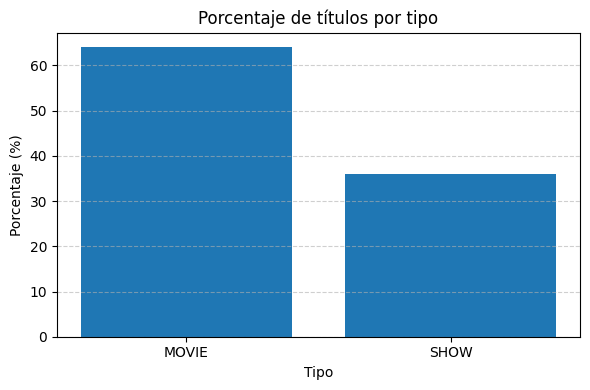

In [205]:
def calcular_porcentajes(conteo: pd.Series) -> pd.Series:
    """Convierte un conteo por tipo en porcentajes redondeados a dos decimales."""
    if not isinstance(conteo, pd.Series):
        raise ValueError("El parámetro 'conteo' debe ser una Serie de pandas.")
    if conteo.empty:
        raise ValueError("La Serie de conteo está vacía.")

    total: Final[int] = int(conteo.sum())
    return ((conteo / total) * 100).round(2)


def graficar_porcentajes(porcentajes: pd.Series) -> None:
    """Grafica barras con los porcentajes por tipo (movie/show)."""
    if porcentajes.empty:
        raise ValueError("No hay datos para graficar.")
    plt.figure(figsize=(6, 4))
    plt.bar(porcentajes.index.str.upper(), porcentajes.values)
    plt.title("Porcentaje de títulos por tipo")
    plt.xlabel("Tipo")
    plt.ylabel("Porcentaje (%)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


# === Ejecución del Ejercicio 3 ===
try:
    # 🔹 Se utiliza la variable 'conteo_tipos' calculada en el Ejercicio 2
    porcentajes_tipos = calcular_porcentajes(conteo_tipos)

    print("=== PORCENTAJE DE TÍTULOS POR TIPO ===\n")
    for tipo, pct in porcentajes_tipos.items():
        print(f"{tipo.upper()}: {pct:.2f}%")

    graficar_porcentajes(porcentajes_tipos)

except NameError:
    print("[ERROR] La variable 'conteo_tipos' no existe. Ejecutar primero el Ejercicio 2.")
except Exception as e:
    print(f"[ERROR] Ejercicio 3: {e}")

# Ejercicio 4
* Calcular la cantidad de películas y series por país.
* Ordenarlas de mayor a menor según el total de series y películas.
* Mostrar los 9 paises con mayor producción.
* Realizar un gráfico de barras horizontales apiladas (películas + series) de los 9 paises con mayor producción.

<br>

_Salida esperada:_
```
                     `PELÍCULAS` `SERIES` `TOTAL`
`PAÍS_PRODUCCIÓN`

US                    100         5       105
...
```



=== CANTIDAD DE PELÍCULAS Y SERIES POR PAÍS (TOP 9) ===

type     PELÍCULAS  SERIES  TOTAL
country                          
US            1499     824   2323
IN             577      45    622
GB             256     148    404
JP             118     169    287
FR             184      64    248
KR              49     179    228
CA             157      62    219
ES             136      75    211
DE             105      34    139


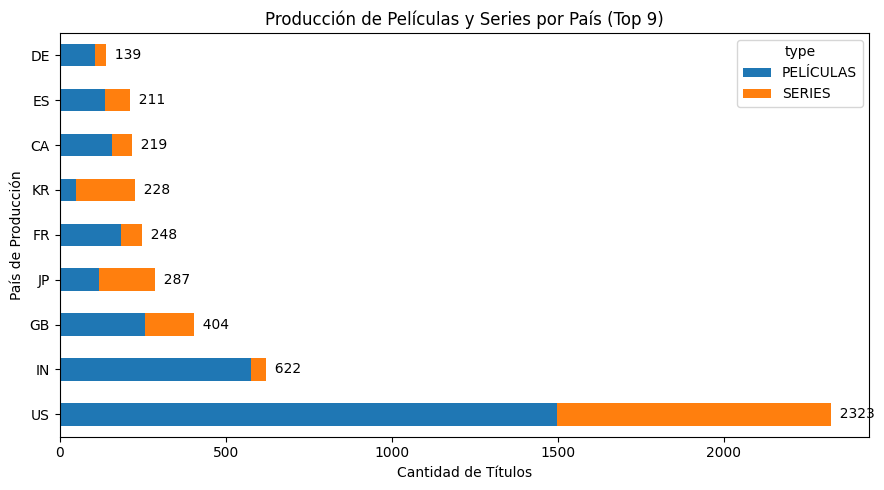

In [206]:
# -*- coding: utf-8 -*-

def calcular_produccion_por_pais(dataset: pd.DataFrame) -> pd.DataFrame:
    """Devuelve PELÍCULAS, SERIES y TOTAL por país (top 9), usando production_countries.

    Trata múltiples países por fila (separados por coma) dividiendo y explotando.

    Args:
        dataset: DataFrame con columnas 'type' y 'production_countries'.

    Returns:
        DataFrame con índice=país y columnas ['PELÍCULAS', 'SERIES', 'TOTAL'] (top 9).

    Raises:
        ValueError: Si faltan columnas, DF vacío o no quedan registros válidos.
    """
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("El parámetro 'dataset' debe ser un DataFrame de pandas.")
    if dataset.empty:
        raise ValueError("El DataFrame está vacío.")

    columnas_requeridas = {"type", "production_countries"}
    if not columnas_requeridas.issubset(dataset.columns):
        raise ValueError(
            "El DataFrame debe contener las columnas 'type' y 'production_countries'."
        )

    df_local = dataset.copy()
    df_local["type"] = df_local["type"].astype(str).str.lower().str.strip()
    df_local["production_countries"] = df_local["production_countries"].astype(str).str.strip()

    # Normaliza nulos/“nan” como vacío
    df_local = df_local[df_local["production_countries"].ne("") & df_local["production_countries"].str.lower().ne("nan")]
    if df_local.empty:
        raise ValueError("No hay registros válidos en 'production_countries'.")

    # Divide múltiples países por coma y explota a filas
    df_local = df_local.assign(
        country=df_local["production_countries"].str.split(",")
    ).explode("country")

    # Limpia espacios y descarta vacíos
    df_local["country"] = df_local["country"].astype(str).str.strip()
    df_local = df_local[df_local["country"].ne("")]
    if df_local.empty:
        raise ValueError("No hay países válidos tras la normalización y explosión.")

    # Conteo por país y tipo -> columnas PELÍCULAS / SERIES
    tabla = (
        df_local.groupby(["country", "type"])
        .size()
        .unstack(fill_value=0)
        .rename(columns={"movie": "PELÍCULAS", "show": "SERIES"})
    )

    # Asegura columnas aunque falte alguna categoría en el dataset
    for col in ["PELÍCULAS", "SERIES"]:
        if col not in tabla.columns:
            tabla[col] = 0

    # Total y top 9
    tabla["TOTAL"] = tabla["PELÍCULAS"] + tabla["SERIES"]
    top9 = tabla.sort_values("TOTAL", ascending=False).head(9)

    return top9


def graficar_produccion_top9(conteo_top9: pd.DataFrame) -> None:
    """Grafica barras horizontales apiladas (PELÍCULAS + SERIES) para el top 9."""
    if not isinstance(conteo_top9, pd.DataFrame) or conteo_top9.empty:
        raise ValueError("No hay datos para graficar.")

    # Ordenar de menor a mayor para que al invertir el eje queden arriba los mayores
    data = conteo_top9.sort_values("TOTAL", ascending=True)

    # Gráfico apilado horizontal
    ax = data[["PELÍCULAS", "SERIES"]].plot(
        kind="barh", stacked=True, figsize=(9, 5)
    )
    ax.set_title("Producción de Películas y Series por País (Top 9)")
    ax.set_xlabel("Cantidad de Títulos")
    ax.set_ylabel("País de Producción")

    # Asegura que el país con mayor TOTAL quede arriba
    ax.invert_yaxis()

    # Etiquetas con el total al final de cada barra (opcional, prolijo para PDF)
    for i, (pel, ser) in enumerate(zip(data["PELÍCULAS"], data["SERIES"])):
        total = pel + ser
        ax.text(pel + ser, i, f"  {total}", va="center")

    plt.tight_layout()
    plt.show()


# === Ejecución única del Ejercicio 4 ===
try:
    produccion_top9 = calcular_produccion_por_pais(df)

    print("=== CANTIDAD DE PELÍCULAS Y SERIES POR PAÍS (TOP 9) ===\n")
    print(produccion_top9[["PELÍCULAS", "SERIES", "TOTAL"]])

    graficar_produccion_top9(produccion_top9)

except Exception as e:
    print(f"[ERROR] Ejercicio 4: {e}")



# Ejercicio 5

Utilizando la columna `runtime` o `duración`, vamos a realizar franjas de 30 minutos, es decir, 0-29, 30-59, 60-89, etc. Con estas franjas se deberán crear las siguientes gráficas:

* Barras horizontal con la cantidad de películas por franja de duración.
* Barras horizontal con la cantidad de series por temporadas.

=== PELÍCULAS POR FRANJA DE DURACIÓN (min) ===


,cantidad
franja_min,
0-29,123
30-59,228
60-89,812
90-119,1813
120-149,585
150-179,154
180-209,24
210-239,4
240-269,1


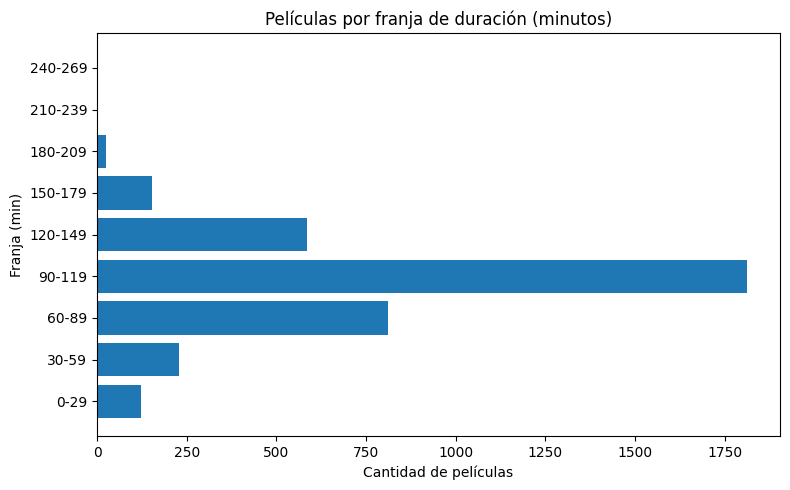


=== SERIES POR NÚMERO DE TEMPORADAS ===


,cantidad
seasons,
1,1221
2,389
3,187
4,120
5,79
6,36
7,18
8,11
9,9


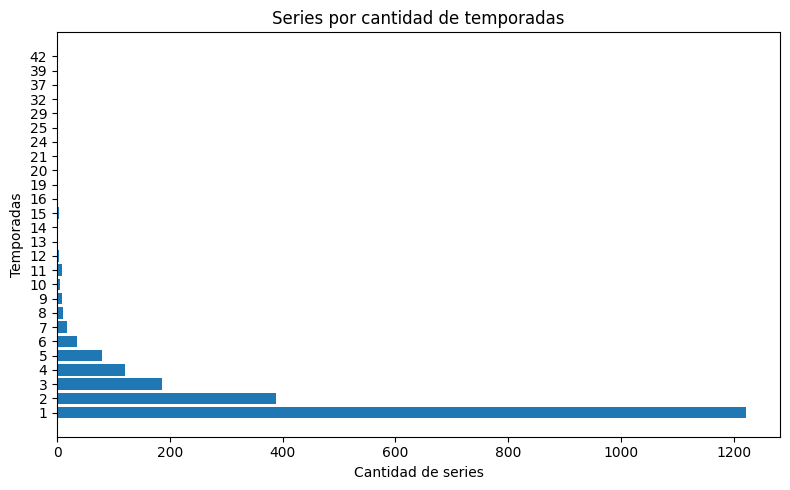

In [207]:
# ----------------------- Funciones auxiliares -----------------------

def crear_franjas_30_min(duraciones_min: pd.Series) -> Tuple[List[int], List[str]]:
    """Genera límites y etiquetas de franjas 0-29, 30-59, 60-89, ... a partir del máximo.

    Args:
        duraciones_min: Serie de duraciones en minutos (numérica o convertible).

    Returns:
        (bins, etiquetas): límites para pd.cut y etiquetas 'a-b'.
    """
    duraciones_validas: pd.Series = pd.to_numeric(duraciones_min, errors="coerce").dropna()
    if duraciones_validas.empty:
        return [0, 30], ["0-29"]
    max_min: int = int(duraciones_validas.max())
    tope: int = int(math.ceil((max_min + 1) / 30.0) * 30)  # múltiplo de 30 hacia arriba
    bins: List[int] = list(range(0, max(30, tope) + 1, 30))
    etiquetas: List[str] = [f"{i}-{i+29}" for i in range(0, max(30, tope), 30)]
    return bins, etiquetas


def graficar_barras_horizontales(
    etiquetas: List[str],
    valores: List[float],
    titulo: str,
    etiqueta_x: str,
    etiqueta_y: str
) -> None:
    """Dibuja un gráfico de barras horizontal sencillo con matplotlib."""
    posiciones = np.arange(len(etiquetas))
    plt.figure(figsize=(8, 5))
    plt.barh(posiciones, valores)
    plt.yticks(posiciones, etiquetas)
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.tight_layout()
    plt.show()


# ------------------------- Ejecución del ejercicio -------------------------

try:
    # Validaciones mínimas y normalización de 'type'
    if "type" not in df.columns:
        raise ValueError("El DataFrame debe contener la columna 'type'.")
    datos: pd.DataFrame = df.copy()
    datos["type"] = datos["type"].astype(str).str.strip().str.lower()

    # ---------------------------
    # A) Películas por franja 30'
    # ---------------------------
    col_duracion: str | None = None
    for cand in ("runtime", "duration"):
        if cand in datos.columns:
            col_duracion = cand
            break
    if col_duracion is None:
        raise ValueError("No se encontró columna de duración ('runtime' o 'duration').")

    peliculas: pd.DataFrame = datos[datos["type"] == "movie"].copy()
    if peliculas.empty:
        raise ValueError("No hay registros de películas para calcular franjas.")

    peliculas[col_duracion] = pd.to_numeric(peliculas[col_duracion], errors="coerce")
    bins, etiquetas_franjas = crear_franjas_30_min(peliculas[col_duracion])

    peliculas["franja_min"] = pd.cut(
        peliculas[col_duracion],
        bins=bins,
        right=False,
        labels=etiquetas_franjas,
        include_lowest=True
    )
    conteo_peliculas_por_franja: pd.Series = (
        peliculas["franja_min"]
        .value_counts()
        .sort_index()
        .reindex(etiquetas_franjas)
        .fillna(0)
        .astype(int)
    )

    print("=== PELÍCULAS POR FRANJA DE DURACIÓN (min) ===")
    display(conteo_peliculas_por_franja.to_frame(name="cantidad"))

    graficar_barras_horizontales(
        etiquetas=list(conteo_peliculas_por_franja.index.astype(str)),
        valores=conteo_peliculas_por_franja.values.tolist(),
        titulo="Películas por franja de duración (minutos)",
        etiqueta_x="Cantidad de películas",
        etiqueta_y="Franja (min)"
    )

    # --------------------------------------
    # B) Series por cantidad de temporadas
    # --------------------------------------
    col_temporadas: str | None = None
    for cand in ("seasons", "number_of_seasons", "season_count"):
        if cand in datos.columns:
            col_temporadas = cand
            break
    if col_temporadas is None:
        raise ValueError(
            "No se encontró la columna de temporadas ('seasons', 'number_of_seasons' o 'season_count')."
        )

    series: pd.DataFrame = datos[datos["type"] == "show"].copy()
    if series.empty:
        raise ValueError("No hay registros de series para calcular temporadas.")

    series[col_temporadas] = pd.to_numeric(series[col_temporadas], errors="coerce")
    temporadas_validas: pd.Series = series[col_temporadas].dropna().astype(int)
    if temporadas_validas.empty:
        raise ValueError("No hay valores numéricos válidos de temporadas para series.")

    conteo_series_por_temporadas: pd.Series = temporadas_validas.value_counts().sort_index()

    print("\n=== SERIES POR NÚMERO DE TEMPORADAS ===")
    display(conteo_series_por_temporadas.to_frame(name="cantidad"))

    graficar_barras_horizontales(
        etiquetas=[str(x) for x in conteo_series_por_temporadas.index.tolist()],
        valores=conteo_series_por_temporadas.values.tolist(),
        titulo="Series por cantidad de temporadas",
        etiqueta_x="Cantidad de series",
        etiqueta_y="Temporadas"
    )

except Exception as error:
    print(f"[ERROR] Ejercicio 5: {error}")

#Ejercicio 6
* Identificar los 8 géneros más frecuentes y mostrar cuántos títulos tienen cada uno.
* Realizar grafico de barras del top.
* Ordenar grafico de mayor a menor.

<br>

_Salida esperada:_

`GENERO`

drama            10

...

=== TOP 8 GÉNEROS POR CANTIDAD DE TÍTULOS ===

drama  2968
comedy  2325
thriller  1228
action  1157
romance  971
documentation  952
crime  936
animation  705


,CANTIDAD
lista_generos,
drama,2968
comedy,2325
thriller,1228
action,1157
romance,971
documentation,952
crime,936
animation,705


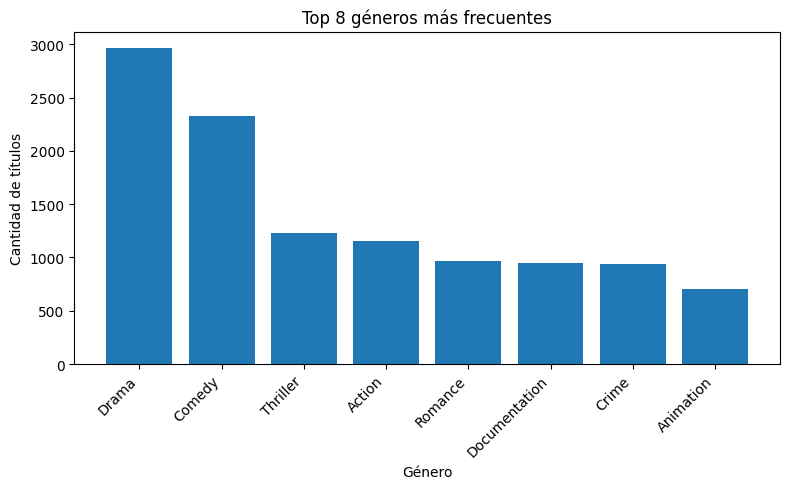

In [208]:
def parsear_generos(celda: object) -> List[str]:
    """Convierte el contenido de 'genres' en lista limpia (minúsculas, sin espacios)."""
    if celda is None or (isinstance(celda, float) and math.isnan(celda)):
        return []
    if isinstance(celda, list):
        return [str(x).strip().lower() for x in celda if str(x).strip()]

    texto = str(celda).strip()
    if not texto:
        return []

    # Intentar interpretar como lista Python (p. ej. "['Drama','Comedy']")
    try:
        evaluado = ast.literal_eval(texto)
        if isinstance(evaluado, (list, tuple)):
            return [str(x).strip().lower() for x in evaluado if str(x).strip()]
    except Exception:
        pass

    # Si no, separar por comas (p. ej. "Drama,Comedy")
    return [x.strip().lower() for x in texto.split(",") if x.strip()]


def obtener_top8_generos(tabla: pd.DataFrame) -> pd.Series:
    """Devuelve el Top 8 de géneros con su cantidad de títulos (ordenado desc)."""
    if not isinstance(tabla, pd.DataFrame) or tabla.empty:
        raise ValueError("El DataFrame está vacío o no es válido.")
    if "genres" not in tabla.columns:
        raise ValueError("El DataFrame debe contener la columna 'genres'.")

    df_copia = tabla.copy()
    df_copia["lista_generos"] = df_copia["genres"].apply(parsear_generos)

    desglosado = df_copia.explode("lista_generos")
    desglosado = desglosado[
        desglosado["lista_generos"].notna() & (desglosado["lista_generos"] != "")
    ]

    if desglosado.empty:
        raise ValueError("No hay géneros válidos para contar.")

    # value_counts() ya devuelve ordenado de mayor a menor
    conteos = desglosado["lista_generos"].value_counts().head(8)
    return conteos


def graficar_top_generos(conteos: pd.Series) -> None:
    """Grafica barras del Top 8 de géneros (ordenado de mayor a menor)."""
    if not isinstance(conteos, pd.Series) or conteos.empty:
        raise ValueError("No hay datos para graficar.")

    plt.figure(figsize=(8, 5))
    plt.bar(conteos.index.str.title(), conteos.values)
    plt.title("Top 8 géneros más frecuentes")
    plt.xlabel("Género")
    plt.ylabel("Cantidad de títulos")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# ------------------------- Ejecución del ejercicio -------------------------

try:
    top8 = obtener_top8_generos(df)

    print("=== TOP 8 GÉNEROS POR CANTIDAD DE TÍTULOS ===\n")
    # Salida esperada estilo:
    # genero  cantidad
    for genero, cant in top8.items():
        print(f"{genero}  {cant}")

    # Mostrar también en tabla (prolijo para Colab/PDF)
    display(top8.to_frame(name="CANTIDAD"))

    graficar_top_generos(top8)

except Exception as error:
    print(f"[ERROR] Ejercicio 6: {error}")


#Ejercicio 7
* Calcular el puntaje promedio por tipo.
* Calcular el puntaje promedio por género.

<br>

_Salida esperada:_

```
Puntaje promedio IMDb por tipo:
TIPO
MOVIE    2.1
...
```

```
Puntaje promedio IMDb por género:
GENERO
history          1.2
...
```

In [209]:

def parsear_generos(celda: object) -> List[str]:
    """Convierte 'genres' en lista limpia (minúsculas, sin espacios)."""
    if celda is None or (isinstance(celda, float) and math.isnan(celda)):
        return []
    if isinstance(celda, list):
        return [str(x).strip().lower() for x in celda if str(x).strip()]

    texto = str(celda).strip()
    if not texto:
        return []

    try:
        evaluado = ast.literal_eval(texto)
        if isinstance(evaluado, (list, tuple)):
            return [str(x).strip().lower() for x in evaluado if str(x).strip()]
    except Exception:
        pass

    return [x.strip().lower() for x in texto.split(",") if x.strip()]


def promedio_imdb_por_tipo(tabla: pd.DataFrame) -> pd.Series:
    """Devuelve promedio IMDb por tipo (movie/show) con 2 decimales."""
    if not isinstance(tabla, pd.DataFrame) or tabla.empty:
        raise ValueError("El DataFrame está vacío o no es válido.")
    requeridas = {"type", "imdb_score"}
    if not requeridas.issubset(tabla.columns):
        raise ValueError("Se requieren las columnas 'type' e 'imdb_score'.")

    df_local = tabla.copy()
    df_local["type"] = df_local["type"].astype(str).str.strip().str.lower()
    df_local["imdb_score"] = pd.to_numeric(df_local["imdb_score"], errors="coerce")

    resultado = (
        df_local.groupby("type", dropna=True)["imdb_score"]
        .mean()
        .round(2)
    )
    # TIPO en mayúsculas para la salida pedida
    resultado.index = resultado.index.str.upper()
    return resultado


def promedio_imdb_por_genero(tabla: pd.DataFrame) -> pd.Series:
    """Devuelve promedio IMDb por género (minúsculas) ordenado desc y 2 decimales."""
    if not isinstance(tabla, pd.DataFrame) or tabla.empty:
        raise ValueError("El DataFrame está vacío o no es válido.")
    requeridas = {"genres", "imdb_score"}
    if not requeridas.issubset(tabla.columns):
        raise ValueError("Se requieren las columnas 'genres' e 'imdb_score'.")

    df_local = tabla.copy()
    df_local["lista_generos"] = df_local["genres"].apply(parsear_generos)
    df_local["imdb_score"] = pd.to_numeric(df_local["imdb_score"], errors="coerce")

    desglosado = df_local.explode("lista_generos")
    desglosado = desglosado[
        desglosado["lista_generos"].notna() & (desglosado["lista_generos"] != "")
    ]
    if desglosado.empty:
        raise ValueError("No hay géneros válidos para calcular promedio.")

    resultado = (
        desglosado.groupby("lista_generos", dropna=True)["imdb_score"]
        .mean()
        .round(2)
        .sort_values(ascending=False)
    )
    return resultado


# -------- Ejecución única (salida textual, sin display) --------

try:
    print("Puntaje promedio IMDb por tipo:")
    promedio_tipo = promedio_imdb_por_tipo(df)
    for tipo, prom in promedio_tipo.items():
        # Ejemplo: "MOVIE    6.25"
        print(f"{tipo:<6}  {prom:>5.2f}")

    print("\nPuntaje promedio IMDb por género:")
    promedio_genero = promedio_imdb_por_genero(df)
    for genero, prom in promedio_genero.items():
        # Ejemplo: "history          7.13"
        print(f"{genero:<15}  {prom:>5.2f}")

except Exception as error:
    print(f"[ERROR] Ejercicio 7: {error}")



Puntaje promedio IMDb por tipo:
MOVIE    6.25
SHOW     6.98

Puntaje promedio IMDb por género:
history           7.13
war               7.07
documentation     7.01
animation         6.70
crime             6.65
sport             6.65
drama             6.62
fantasy           6.56
scifi             6.55
european          6.53
music             6.51
western           6.48
action            6.42
reality           6.41
comedy            6.39
romance           6.38
thriller          6.37
family            6.33
horror            6.01


#Ejercicio 8
* Crear una columna llamada "nombres_descripcion" que extraiga posibles nombres (ej: “John Smith”) desde la columna description.
* Mostar las 15 primeras filas con los nombres extraidos.

<br>

_Salida esperada:_

```
      title	                              nombres_descripcion
0	    Five Came Back: The Reference Films	[....]

```

In [210]:

def extraer_nombres_desde_texto(texto: object) -> List[str]:
    """Extrae posibles nombres propios del texto usando expresiones regulares.

    Un nombre válido se considera como:
    - Dos o más palabras consecutivas que comienzan con mayúscula (A–Z o acentuadas).
    - Ejemplo: "John Smith", "María José", "Anne Frank".

    Args:
        texto (object): Cadena de texto (columna 'description').

    Returns:
        List[str]: Lista de nombres encontrados (sin duplicados, con formato original).
    """
    if texto is None or not str(texto).strip():
        return []
    s = str(texto)

    # Buscar combinaciones de palabras capitalizadas consecutivas
    # (Ej.: "John Smith", "Anne Frank", "María José")
    patron = r"\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)+)\b"
    encontrados = re.findall(patron, s)

    # Quitar duplicados preservando el orden
    vistos = set()
    nombres = []
    for n in encontrados:
        if n not in vistos:
            vistos.add(n)
            nombres.append(n)
    return nombres


def agregar_columna_nombres(df: pd.DataFrame) -> pd.DataFrame:
    """Agrega la columna 'nombres_descripcion' al DataFrame.

    Args:
        df (pd.DataFrame): Debe contener la columna 'description'.

    Returns:
        pd.DataFrame: Copia del DataFrame con la nueva columna agregada.

    Raises:
        ValueError: Si falta la columna 'description'.
    """
    if "description" not in df.columns:
        raise ValueError("El DataFrame debe contener la columna 'description'.")

    dfl = df.copy()
    dfl["nombres_descripcion"] = dfl["description"].apply(extraer_nombres_desde_texto)
    return dfl


# ✅ Ejecución del ejercicio (usa el DataFrame 'df' cargado antes)
df_nombres = agregar_columna_nombres(df)

print("=== PRIMERAS 15 FILAS CON NOMBRES EXTRAÍDOS ===")
display(df_nombres.loc[:, ["title", "nombres_descripcion"]].head(15))


=== PRIMERAS 15 FILAS CON NOMBRES EXTRAÍDOS ===


,title,nombres_descripcion
0,Five Came Back: The Reference Films,"[World War, Five Came Back]"
1,Taxi Driver,"[Vietnam War, New York City]"
2,Deliverance,"[Cahulawassee River, Lewis Medlock]"
3,Monty Python and the Holy Grail,"[King Arthur, Round Table, Sir Bedevere, Sir L..."
4,The Dirty Dozen,[World War]
5,Monty Python's Flying Circus,[]
6,Life of Brian,"[Brian Cohen, Pontius Pilate, Monty Python]"
7,Dirty Harry,"[San Francisco, Harry Callahan]"
8,Bonnie and Clyde,"[Bonnie Parker, Clyde Barrow]"
9,The Blue Lagoon,[]


# Ejercicio 9
* Realizar un grafico de barra horizontal de cuántos títulos hay por década.

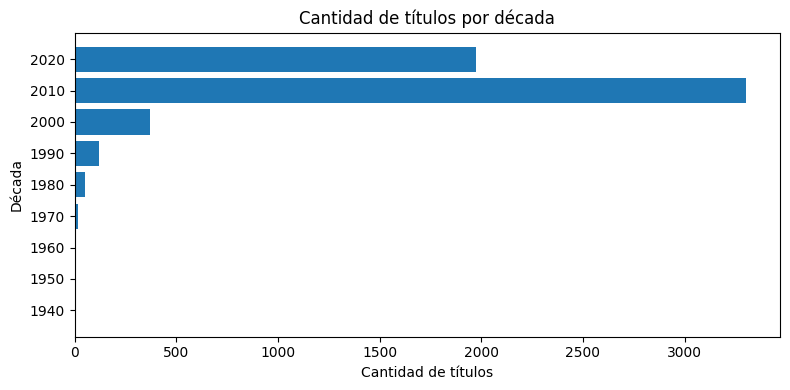

In [211]:

def convertir_a_decada(anio: object) -> int | None:
    """Convierte un año a su década correspondiente.

    Ejemplo:
        1994 → 1990
        2021 → 2020

    Args:
        anio (object): Año (numérico o string convertible a int).

    Returns:
        int | None: Década (entero) o None si el valor no es convertible.
    """
    try:
        anio_int = int(anio)
        if anio_int < 1800 or anio_int > 2100:
            return None  # fuera de rango razonable
        return (anio_int // 10) * 10
    except Exception:
        return None


def contar_titulos_por_decada(df: pd.DataFrame) -> pd.Series:
    """Cuenta la cantidad de títulos por década.

    Args:
        df (pd.DataFrame): DataFrame con la columna 'release_year'.

    Returns:
        pd.Series: Serie indexada por década con la cantidad de títulos, ordenada ascendentemente.

    Raises:
        ValueError: Si falta la columna 'release_year' o el DataFrame está vacío.
    """
    if "release_year" not in df.columns:
        raise ValueError("El DataFrame debe contener la columna 'release_year'.")
    if df.empty:
        raise ValueError("El DataFrame está vacío.")

    dfl = df.copy()
    dfl["decada"] = dfl["release_year"].apply(convertir_a_decada)
    conteo = dfl["decada"].value_counts(dropna=True).sort_index()
    return conteo


def graficar_titulos_por_decada(conteo: pd.Series) -> None:
    """Genera un gráfico de barras horizontal con la cantidad de títulos por década.

    Args:
        conteo (pd.Series): Serie con índice = década y valores = cantidad de títulos.
    """
    plt.figure()
    plt.barh(conteo.index.astype(str), conteo.values)
    plt.title("Cantidad de títulos por década")
    plt.xlabel("Cantidad de títulos")
    plt.ylabel("Década")
    plt.tight_layout()
    plt.show()


# ✅ Ejecución del ejercicio (usa el DataFrame 'df' de ejercicios previos)
conteo_decadas = contar_titulos_por_decada(df)



graficar_titulos_por_decada(conteo_decadas)


# Ejercicio 10
* Filtrar las producciones donde uno de los países involucrados sea **Francia**.
* Tokenizar las descripciones de las producciones filtradas.
* Eliminar stopwords y palabras no alfabéticas.
* Contar las palabras más frecuentes.
* Mostrar el top 10 en un gráfico de barras.

✅ Producciones con Francia: 248 filas


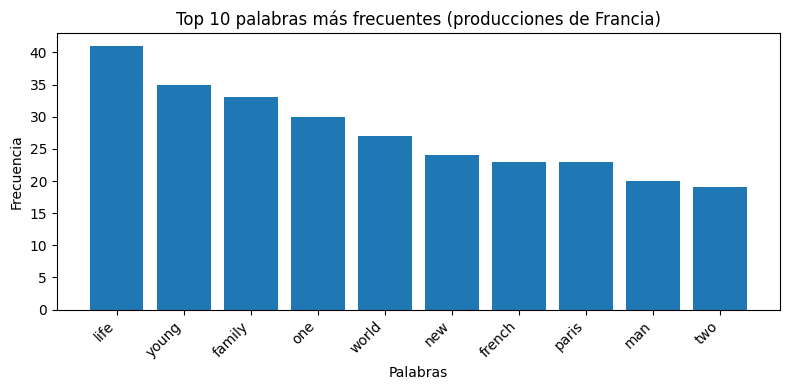

,palabra,frecuencia
0,life,41
1,young,35
2,family,33
3,one,30
4,world,27
5,new,24
6,french,23
7,paris,23
8,man,20
9,two,19


In [213]:
# === FUNCIONES AUXILIARES ===

def load_dataset(csv_path: str) -> pd.DataFrame:
    """Carga robusta del CSV IMDb con validaciones."""
    return pd.read_csv(csv_path, encoding="utf-8", low_memory=False)

def filter_by_france(df: pd.DataFrame) -> pd.DataFrame:
    """Filtra producciones donde 'FR' esté presente en production_countries."""
    mask = df["production_countries"].astype(str).str.contains("FR", na=False)
    return df[mask].copy()

def tokenize_description(text: str):
    """Tokeniza una descripción, manejando valores nulos."""
    if pd.isna(text):
        return []
    return word_tokenize(str(text))

def clean_tokens(tokens):
    """Convierte tokens a minúsculas, elimina stopwords y deja solo alfabéticos."""
    stops = set(stopwords.words('english')) | set(stopwords.words('french'))
    return [t.lower() for t in tokens if t.isalpha() and t.lower() not in stops]

def count_words(token_lists):
    """Cuenta frecuencias de palabras en una lista de listas de tokens."""
    counter = Counter()
    for lst in token_lists:
        counter.update(lst)
    return counter

def plot_top10(counter: Counter):
    """Muestra el top 10 de palabras más frecuentes en un gráfico de barras."""
    top10 = counter.most_common(10)
    if not top10:
        print("No hay palabras para mostrar.")
        return
    words, freqs = zip(*top10)
    plt.bar(words, freqs)
    plt.title("Top 10 palabras más frecuentes (producciones de Francia)")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    return pd.DataFrame(top10, columns=["palabra", "frecuencia"])



# === (1) CARGAR Y FILTRAR ===
df = load_dataset(CSV_PATH)
df_fr = filter_by_france(df)
print(f"✅ Producciones con Francia: {df_fr.shape[0]} filas")

# === (2) TOKENIZAR DESCRIPCIONES ===
df_fr["tokens"] = df_fr["description"].apply(tokenize_description)

# === (3) LIMPIAR TOKENS ===
df_fr["tokens_limpios"] = df_fr["tokens"].apply(clean_tokens)

# === (4) CONTAR PALABRAS ===
counter = count_words(df_fr["tokens_limpios"])

# === (5) MOSTRAR TOP 10 ===
top10_df = plot_top10(counter)
display(top10_df)